In [2]:
import matplotlib.pyplot as plt
import json
import os

In [3]:
def plot(data, title):
    plt.figure(figsize=(20, 6))
    bars = plt.bar(data.keys(), data.values())
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', rotation=90)

    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

took out:

"LLaMAForCausalLM": [
    "4bit/alpaca-7b-native-4bit",
    "DioBrandoTheFirst/gpt4-x-alpaca-13b-native-4bit-128g",
    "Enoch/llama-65b-hf",
    "James-WYang/BigTranslate",
    "Rardilit/Panther_v1",
    "Sandiago21/llama-7b-hf-prompt-answering",
    "aleksickx/llama-7b-hf",
    "anon8231489123/gpt4-x-alpaca-13b-native-4bit-128g",
    "chavinlo/alpaca-13b",
    "decapoda-research/llama-13b-hf",
    "decapoda-research/llama-30b-hf",
    "decapoda-research/llama-65b-hf",
    "decapoda-research/llama-7b-hf",
    "deerslab/llama-7b-embeddings",
    "kuleshov/llama-7b-4bit",
    "likenneth/honest_llama2_chat_7B",
    "nenkoru/llama-7b-onnx-fp16",
    "ozcur/alpaca-native-4bit",
    "quincyqiang/llama-7b-alpaca",
    "shalomma/llama-7b-embeddings"
],

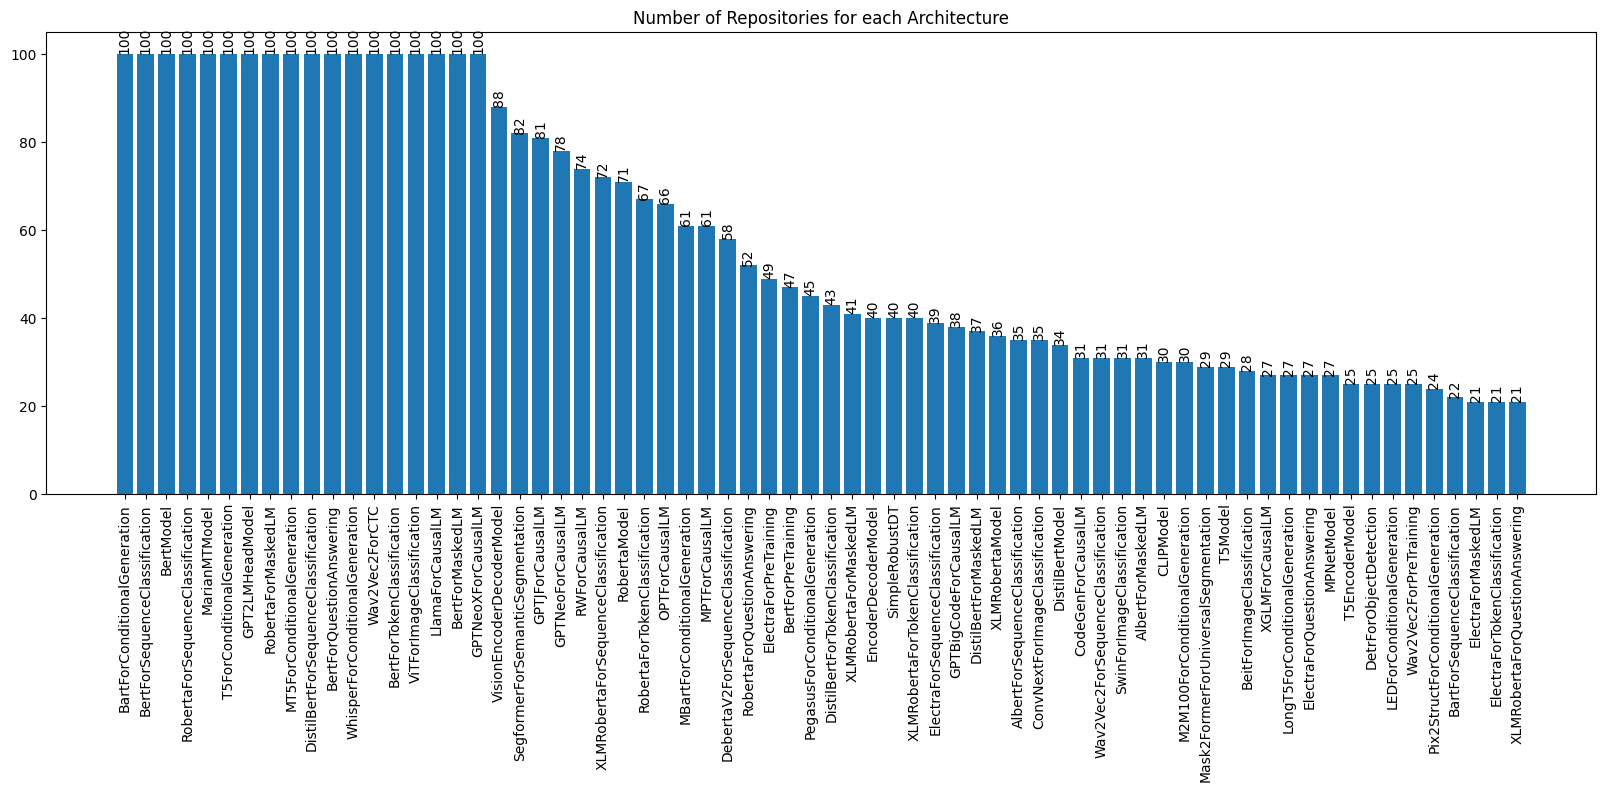

In [4]:
with open("/depot/davisjam/data/mingyu/PTM-Naming/data_files/json_files/arch_to_repo_name.json", 'r') as f:
    arch_to_repo_name = json.load(f) # repo names of 20  <= arch <= 100
# arch_to_repo_name = {k: len(v) for k, v in arch_to_repo_name.items()}
arch_to_repo_name_count = {k: len(v) for k, v in sorted(arch_to_repo_name.items(), key=lambda item: item[1], reverse=True)}
arch_to_repo_name_count = dict(sorted(arch_to_repo_name_count.items(), key=lambda v: v[1], reverse=True))
plot(arch_to_repo_name_count, "Number of Repositories for each Architecture")

In [5]:
# Succeeded retrieving graph structure for repo_names in 20 <= arch <= 100
with open("/depot/davisjam/data/mingyu/PTM-Naming/data_files/json_files/selected_quantized_model.json", "r") as f:
    selected_quantized_model = json.load(f)

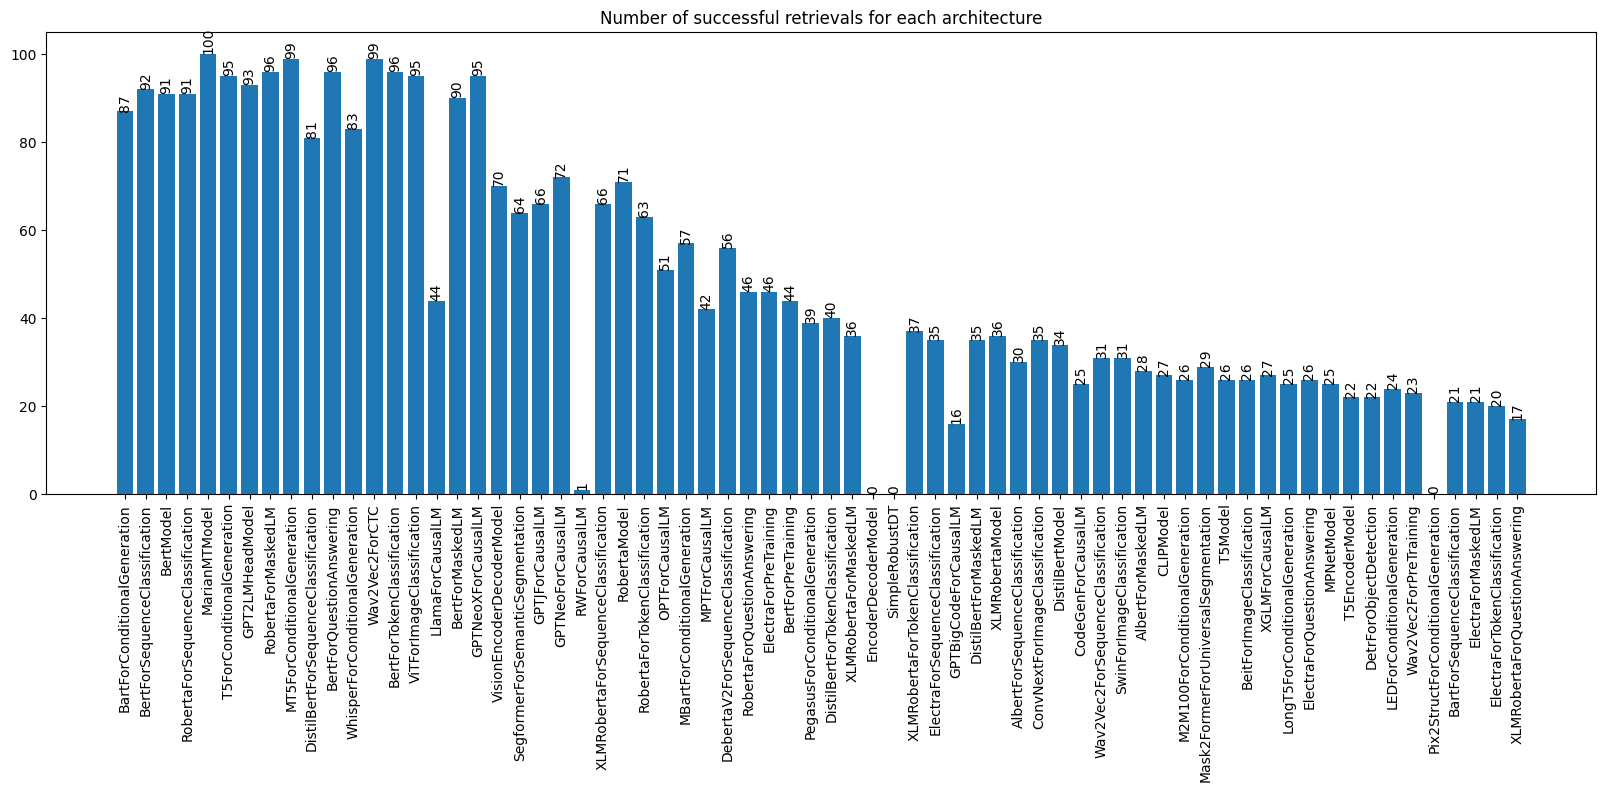

Retrieval rate: 0.8555298947908647% (3334/3897)


In [6]:
successful_retreivals = {arch: 0 for arch in arch_to_repo_name_count.keys()}
for arch, repo_name in arch_to_repo_name.items():
    for repo in repo_name:
        if repo in selected_quantized_model.keys():
            successful_retreivals[arch] += 1
            
# successful_retreivals
plot(successful_retreivals, "Number of successful retrievals for each architecture")
print(f"Retrieval rate: {len(selected_quantized_model)/sum(arch_to_repo_name_count.values())}% ({len(selected_quantized_model)}/{sum(arch_to_repo_name_count.values())})")


In [7]:
selected_quantized_model.keys()

dict_keys(['bofenghuang/whisper-large-v2-cv11-german', 'vumichien/whisper-large-v2-mix-jp', 'cahya/whisper-medium-id', 'vasista22/whisper-hindi-medium', 'ihanif/whisper-medium-urdu', 'bangla-speech-processing/BanglaASR', 'biodatlab/whisper-th-medium-combined', 'Scrya/whisper-large-v2-cantonese', 'openai/whisper-large-v2', 'pierreguillou/whisper-medium-french', 'Shiry/whisper-large-v2-he', 'mn367/whisper-medium-hi', 'ales/whisper-small-belarusian', 'RetaSy/whisper-test-ar-tarteel', 'vasista22/whisper-hindi-large-v2', 'NicoHi/whisper-base-voice-commands', 'bofenghuang/whisper-large-v2-french', 'pnandhini/whisper_common_voice_small_en', 'vasista22/whisper-tamil-large-v2', 'jonatasgrosman/whisper-large-pt-cv11', 'seastar105/whisper-medium-ko-zeroth', 'jlondonobo/whisper-medium-pt', 'SungBeom/whisper-small-ko', 'openai/whisper-small.en', 'DrishtiSharma/whisper-large-v2-hungarian', 'simonl0909/whisper-large-v2-cantonese', 'anuragshas/whisper-small-bn', 'vasista22/whisper-hindi-small', 'Zaid/

In [8]:
import sqlite3
import os
from dotenv import load_dotenv

load_dotenv(".env")

with open("data_files/sql/get_distinct_task.sql", "r", encoding="utf-8") as f:
    query = f.read()
conn = sqlite3.connect(str(os.getenv("PEATMOSS_DB")))
c = conn.cursor()
c.execute(query)
# c.execute("PRAGMA table_info(framework)")
# c.execute("SELECT name FROM sqlite_master WHERE type='table';")

task_list = c.fetchall()
print(task_list)
task = sorted(['none' if task[0] == None else task[0] for task in task_list])

print(f"List of tasks in HF: {task}")
conn.close()

[(None,), ('summarization',), ('text-classification',), ('text-generation',), ('text2text-generation',), ('token-classification',), ('conversational',), ('text-to-image',), ('reinforcement-learning',), ('feature-extraction',), ('automatic-speech-recognition',), ('sentence-similarity',), ('fill-mask',), ('image-classification',), ('question-answering',), ('image-to-text',), ('translation',), ('image-to-image',), ('zero-shot-image-classification',), ('image-segmentation',), ('audio-classification',), ('zero-shot-classification',), ('text-to-speech',), ('object-detection',), ('audio-to-audio',), ('unconditional-image-generation',), ('visual-question-answering',), ('text-to-text-generation',), ('depth-estimation',), ('speaker-diarization',), ('voice-activity-detection',), ('video-classification',), ('audio-captioning',), ('document-question-answering',), ('table-question-answering',), ('image-captioning',), ('text-to-video',), ('image-text-matching',), ('pretraining',), ('text ranking',), 

In [9]:
# TODO: write down task name manual
task_list = ['image-text-to-text', 
             'visual-question-answering', 
             'document-question-answering', 
             'depth-estimation', 
             'image-classification', 
             'object-detection', 
             'image-segmentation', 
             'text-to-image', 
             'image-to-text', 
             'image-to-image', 
             'image-to-video', 
             'unconditional-image-generation', 
             'video-classification', 
             'text-to-video', 
             'zero-shot-image-classification',
             'mask-generation',
             'zero-shot-object-detection',
             'text-to-3d', 
             'image-to-3d', 
             'image-feature-extraction', 
             'text-classification',
             'token-classification',
             'table-question-answering',
             'question-answering',
             'zero-shot-classification',
             'translation',
             'summarization',
             'feature-extraction',
             'text-generation',
             'text2text-generation',
             'fill-mask',
             'sentence-similarity',
             'text-to-speech', 
             'text-to-audio', 
             'automatic-speech-recognition', 
             'audio-to-audio', 
             'audio-classification', 
             'voice-activity-detection', 
             'tabular-classificaiton', 
             'tabular-regression', 
             'time-series-forecasting', 
             'reinforcement-learning', 
             'robotics', 
             'graph-machine-learning', 
             None
             ]

In [10]:
True if 'text-to-3D' in task else False
# for t in task_list:
#     print(f"{t}\n")

False

In [11]:
query = '''
SELECT DISTINCT model.context_id, architecture.name, framework.name, model_task.name
FROM model
    LEFT OUTER JOIN model_to_framework ON model.id = model_to_framework.model_id
    LEFT OUTER JOIN framework ON model_to_framework.framework_id = framework.id
    LEFT OUTER JOIN model_to_model_task ON model.id = model_to_model_task.model_id
    LEFT OUTER JOIN model_task ON model_task.id = model_to_model_task.model_task_id
    LEFT OUTER JOIN model_to_architecture ON model_to_architecture.model_id = model.id
    LEFT OUTER JOIN architecture ON model_to_architecture.architecture_id = architecture.id
WHERE model.context_id IN ({}) AND framework.name NOT in ('pytorch', 'tf', 'jax') 
'''.format(','.join(['?'] * len(selected_quantized_model)))#, ','.join(['?'] * len(wrong_model_type)))#, ','.join(['?'] * len(task_list)))

# query = '''
# SELECT DISTINCT model.context_id, architecture.name
# FROM 
#     model,
#     model_to_architecture, 
#     architecture
# WHERE architecture.id = model_to_architecture.architecture_id
#     AND model.id = model_to_architecture.model_id
#     AND model.downloads > 50
#     AND model.context_id IN ({})
# '''.format(','.join(['?'] * len(selected_quantized_model)))
query = '''
SELECT model.context_id, architecture.name, framework.name, GROUP_CONCAT(tag.name) AS tags
FROM model
    LEFT OUTER JOIN model_to_architecture ON model.id = model_to_architecture.model_id
    LEFT OUTER JOIN architecture ON architecture.id = model_to_architecture.architecture_id
    LEFT OUTER JOIN model_to_framework ON model.id = model_to_framework.model_id
    LEFT OUTER JOIN framework ON model_to_framework.framework_id = framework.id
    LEFT OUTER JOIN model_to_tag ON model.id = model_to_tag.model_id
    LEFT OUTER JOIN tag ON model_to_tag.tag_id = tag.id
WHERE model.context_id IN ({}) AND framework.name NOT in ('pytorch', 'tf', 'jax') AND architecture.name NOT in ('LLaMAForCausalLM') 
GROUP BY model.context_id
'''.format(','.join(['?'] * len(selected_quantized_model)))

In [12]:
conn = sqlite3.connect(str(os.getenv("PEATMOSS_DB")))
c = conn.cursor()
c.execute(query, list(selected_quantized_model.keys()))# + wrong_model_type )#+ task_list)
model_list_raw = c.fetchall()
# task = [task[0] for task in task_list]
# model_list = [model[0] for model in model_list_raw]
conn.close()

In [13]:
model_list_raw

[('0x7194633/rubert-base-massive-ner',
  'BertForTokenClassification',
  'bert',
  'autotrain_compatible,bert,token-classification'),
 ('203427as321/hnai_model',
  'XLMRobertaForSequenceClassification',
  'xlm-roberta',
  'text-classification,generated_from_trainer,xlm-roberta'),
 ('2rtl3/mn-xlm-roberta-base-named-entity',
  'XLMRobertaForTokenClassification',
  'xlm-roberta',
  'autotrain_compatible,generated_from_trainer,xlm-roberta,token-classification'),
 ('3BDOAi3/finetuned_with_labeled_dataset',
  'MT5ForConditionalGeneration',
  'mt5',
  'autotrain_compatible,text-generation-inference,text2text-generation,mt5'),
 ('51la5/roberta-large-NER',
  'XLMRobertaForTokenClassification',
  'xlm-roberta',
  'autotrain_compatible,xlm-roberta,has_space,token-classification'),
 ('AI-Growth-Lab/PatentSBERTa',
  'MPNetModel',
  'mpnet',
  'has_space,mpnet,feature-extraction,sentence-similarity'),
 ('AI-MeisterBin/ko-sentence-bert-MeisterBin',
  'RobertaModel',
  'roberta',
  'roberta,feature-ex

In [14]:
len(model_list_raw)

3331

In [15]:
import os
# Retreive tasks from all tags, store layers, repo_name, model_type, arch, task(s) in json format

file_path = './selected_peatmoss_vec_data_path'

# (repo_name, arch, model_type, tags)

#TODO: work from here
temp = set()
dataset = []
distinct_layers = set()
for model in model_list_raw:
    print(model)
    meta_data = {}

    meta_data['repo_name'] = model[0]
    meta_data['arch'] = model[1]
    meta_data['model_type'] = model[2]
    if 'Model' in model[1]:
        meta_data['task'] = 'N/A'
    elif 'For' in model[1]:
        meta_data['task'] = model[1].split('For')[1]
    else:
        temp.add(model[1])
    if model[3] == None:
        meta_data['tasks'] = 'N/A'
    else:
        meta_data['tasks'] = ', '.join(tag for tag in model[3].split(',') if tag in task_list)
    print(meta_data)

    with open(f"{file_path}/ann/{meta_data['repo_name']}.json", 'r') as f:
        aptm = json.load(f)
    
    first_undefined = True
    layers = []
    for layer in aptm:
        if layer['operation'] == 'Undefined':
            if first_undefined:
                layers.append('input')
                first_undefined = False
            else:
                layers.append('output')
                break
        else:
            if layer['operation'].lower() == 'add_':
                layers.append('add')
            elif layer['operation'].lower() == 'div_':
                layers.append('div')
            elif layer['operation'].lower() == 'masked_fill_':
                layers.append('masked_fill')
            else:
                layers.append(layer['operation'].lower())
            distinct_layers.add(layer['operation'].lower())
    
    layers = ' '.join(layers)
    meta_data['layers'] = layers
    
    dataset.append(meta_data)   
print(len(dataset))

file_path = './selected_peatmoss_vec_data_path/peatmoss_data.json'


with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(dataset, file, indent=4)
    

('0x7194633/rubert-base-massive-ner', 'BertForTokenClassification', 'bert', 'autotrain_compatible,bert,token-classification')
{'repo_name': '0x7194633/rubert-base-massive-ner', 'arch': 'BertForTokenClassification', 'model_type': 'bert', 'task': 'TokenClassification', 'tasks': 'token-classification'}
('203427as321/hnai_model', 'XLMRobertaForSequenceClassification', 'xlm-roberta', 'text-classification,generated_from_trainer,xlm-roberta')
{'repo_name': '203427as321/hnai_model', 'arch': 'XLMRobertaForSequenceClassification', 'model_type': 'xlm-roberta', 'task': 'SequenceClassification', 'tasks': 'text-classification'}
('2rtl3/mn-xlm-roberta-base-named-entity', 'XLMRobertaForTokenClassification', 'xlm-roberta', 'autotrain_compatible,generated_from_trainer,xlm-roberta,token-classification')
{'repo_name': '2rtl3/mn-xlm-roberta-base-named-entity', 'arch': 'XLMRobertaForTokenClassification', 'model_type': 'xlm-roberta', 'task': 'TokenClassification', 'tasks': 'token-classification'}
('3BDOAi3/f

In [16]:
temp

set()

In [17]:
distinct_layers

{'__getitem__',
 '__rsub__',
 'adaptiveavgpool1d',
 'add',
 'add_',
 'all',
 'any',
 'argmax',
 'as_strided',
 'baddbmm',
 'bartlearnedpositionalembedding',
 'bartscaledwordembedding',
 'beitdroppath',
 'bmm',
 'bool',
 'cat',
 'chunk',
 'clamp',
 'contiguous',
 'conv1d',
 'conv2d',
 'convnextlayernorm',
 'cumsum',
 'detrfrozenbatchnorm2d',
 'detrsinepositionembedding',
 'div',
 'div_',
 'donutswindroppath',
 'dropout',
 'einsum',
 'embedding',
 'eq',
 'expand',
 'expand_as',
 'fastgeluactivation',
 'flatten',
 'flip',
 'float',
 'full_like',
 'gather',
 'gelu',
 'geluactivation',
 'gptneoxrotaryembedding',
 'grid_sample',
 'groupnorm',
 'int',
 'interpolate',
 'isinf',
 'isnan',
 'layernorm',
 'linear',
 'linear4bit',
 'linear8bitlt',
 'llamalinearscalingrotaryembedding',
 'llamarmsnorm',
 'llamarotaryembedding',
 'long',
 'longt5layernorm',
 'm2m100scaledwordembedding',
 'm2m100sinusoidalpositionalembedding',
 'mask2formersinepositionembedding',
 'masked_fill',
 'masked_fill_',
 'mat

OrderedDict([('MarianMTModel', 100), ('MT5ForConditionalGeneration', 99), ('Wav2Vec2ForCTC', 99), ('BertForTokenClassification', 96), ('RobertaForMaskedLM', 96), ('BertForQuestionAnswering', 96), ('ViTForImageClassification', 95), ('T5ForConditionalGeneration', 95), ('GPTNeoXForCausalLM', 95), ('GPT2LMHeadModel', 93), ('BertForSequenceClassification', 92), ('RobertaForSequenceClassification', 91), ('BertModel', 91), ('BertForMaskedLM', 90), ('BartForConditionalGeneration', 87), ('WhisperForConditionalGeneration', 83), ('DistilBertForSequenceClassification', 81), ('GPTNeoForCausalLM', 72), ('RobertaModel', 71), ('VisionEncoderDecoderModel', 70), ('XLMRobertaForSequenceClassification', 66), ('GPTJForCausalLM', 66), ('SegformerForSemanticSegmentation', 64), ('RobertaForTokenClassification', 63), ('MBartForConditionalGeneration', 57), ('DebertaV2ForSequenceClassification', 56), ('OPTForCausalLM', 51), ('RobertaForQuestionAnswering', 46), ('ElectraForPreTraining', 46), ('LlamaForCausalLM', 

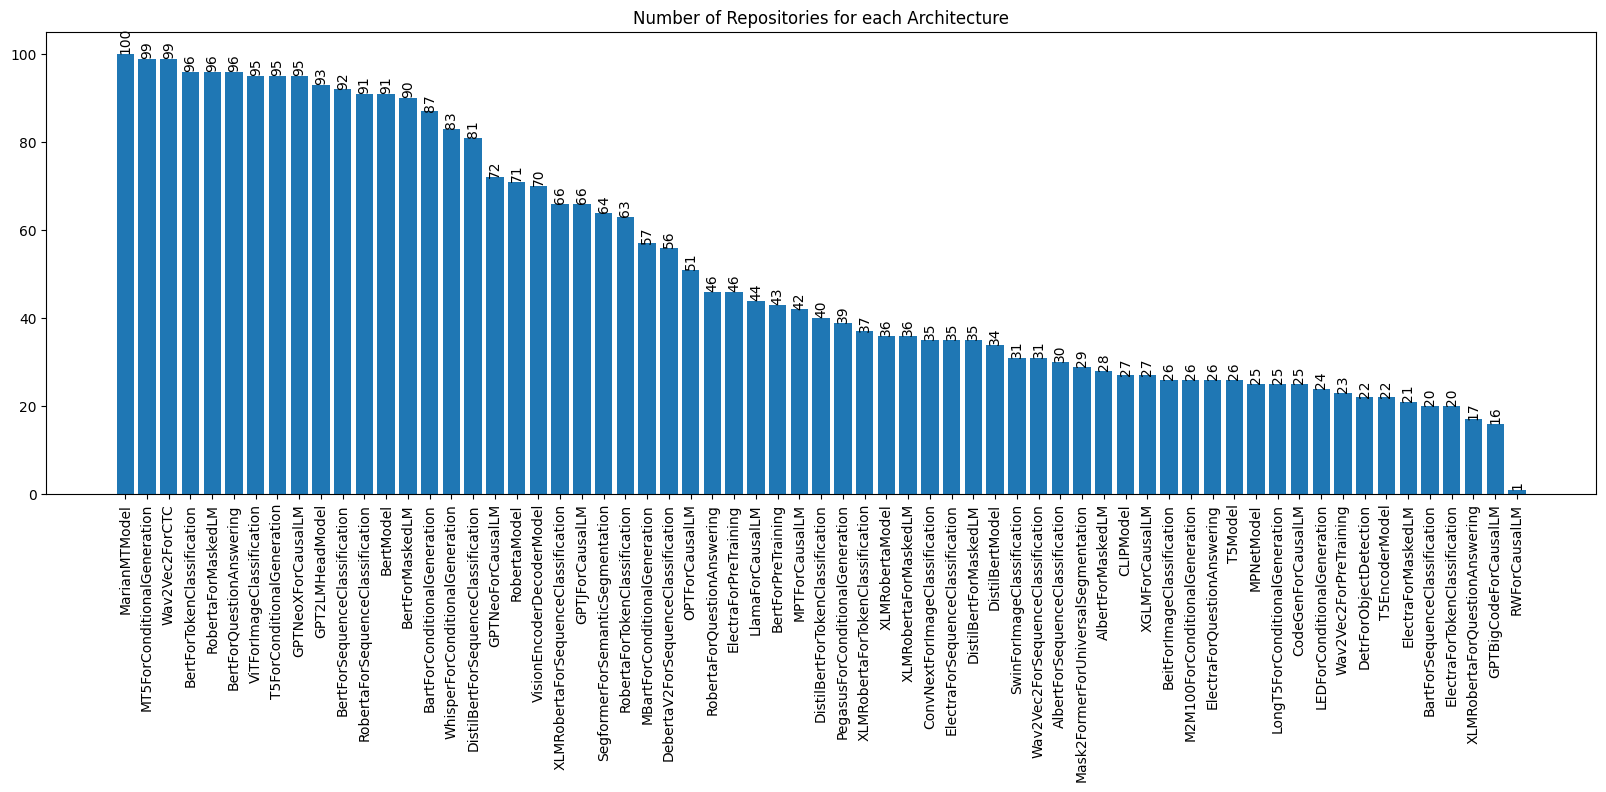

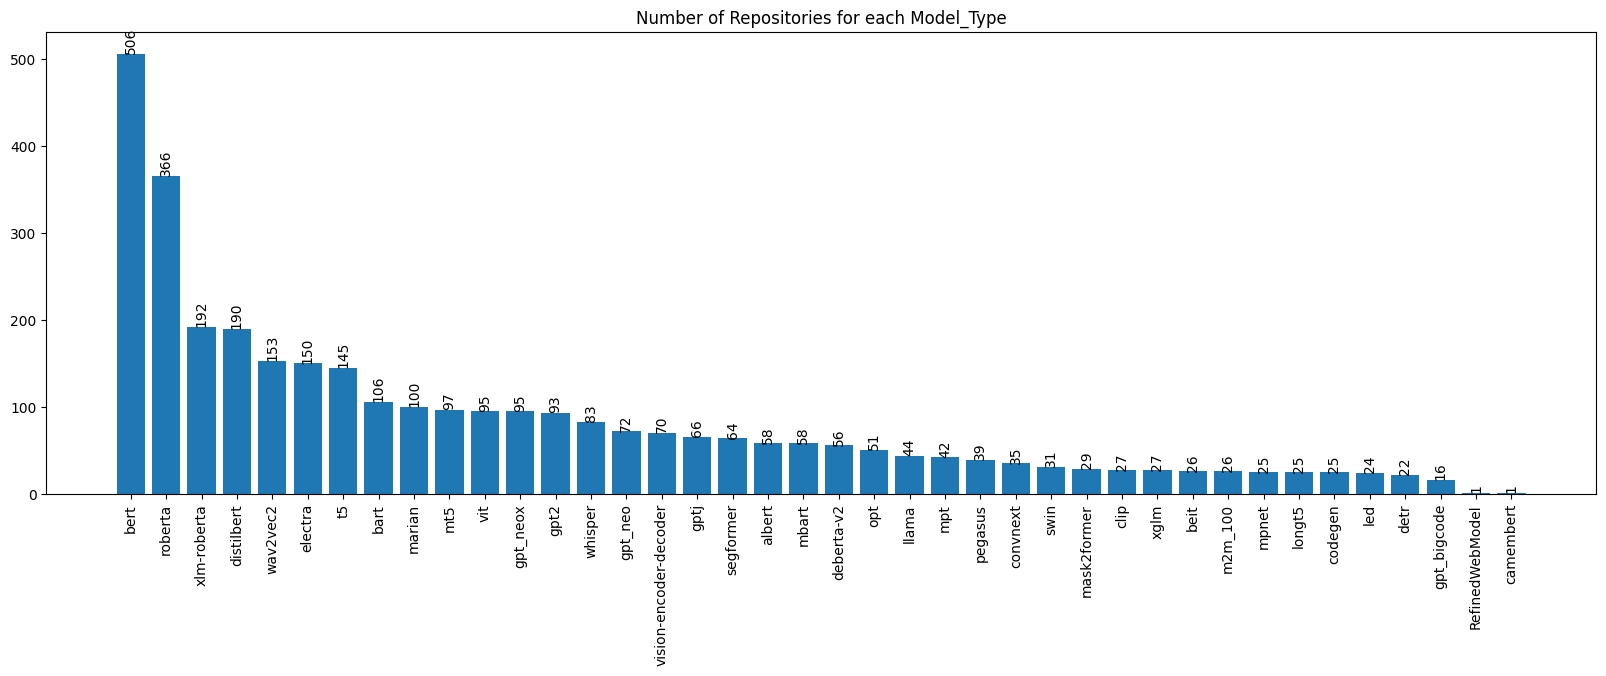

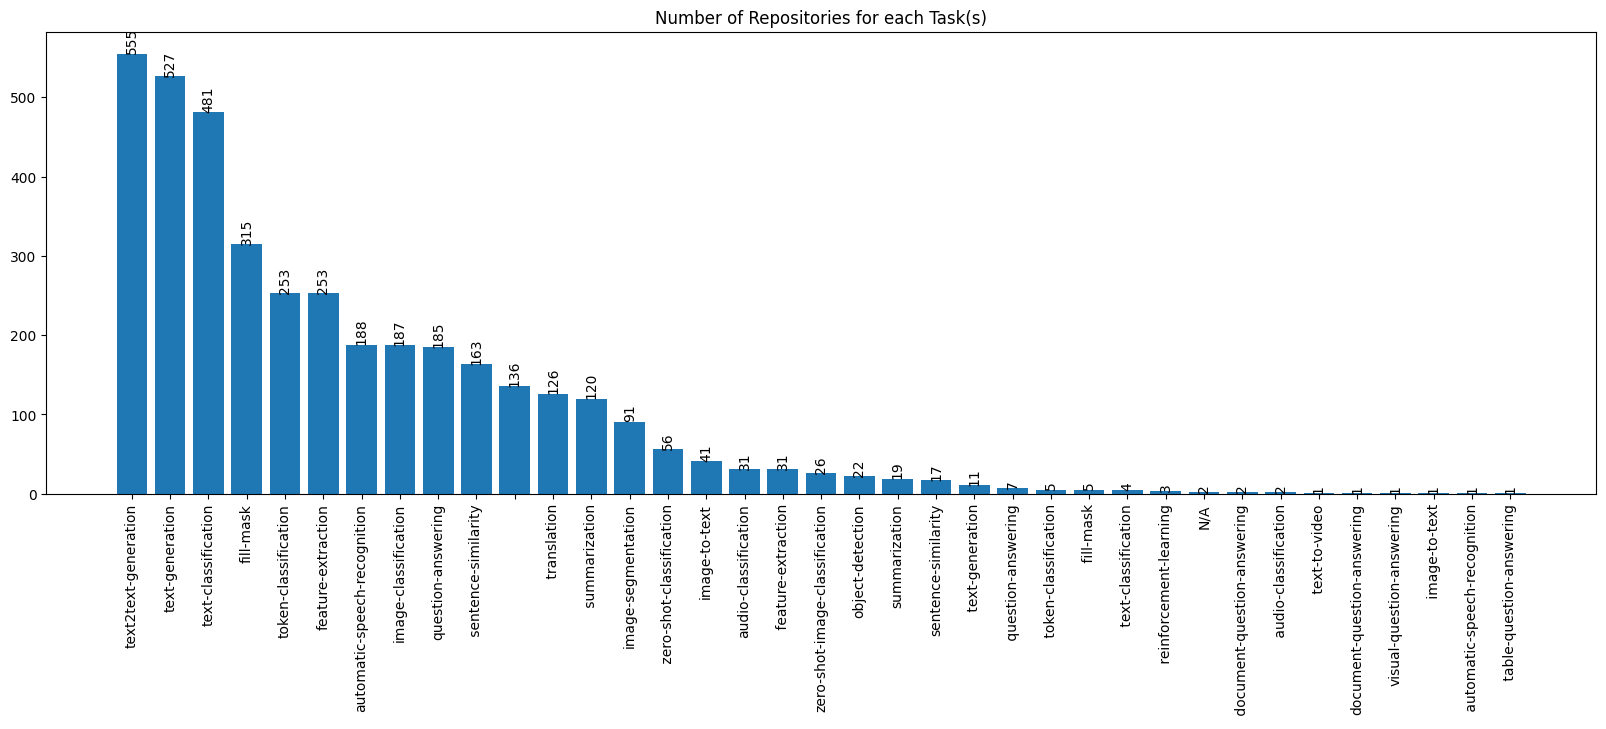

In [18]:
from collections import Counter, OrderedDict

arch = {}
model_type = {}
tasks = {}
for data in dataset:
    if data['arch'] not in arch:
        arch[data['arch']] = 1
    else:
        arch[data['arch']] += 1
    if data['model_type'] not in model_type:
        model_type[data['model_type']] = 1
    else:
        model_type[data['model_type']] += 1
    for task in data['tasks'].split(','):
        if task not in tasks:
            tasks[task] = 1
        else:
            tasks[task] += 1
            
a = Counter(arch)
a = OrderedDict(sorted(a.items(), key=lambda x: x[1], reverse=True))
print(a)
m = Counter(model_type)
m = OrderedDict(sorted(m.items(), key=lambda x: x[1], reverse=True))
print(c)
t = Counter(tasks)
t = OrderedDict(sorted(t.items(), key=lambda x: x[1], reverse=True))
print(t)

# arch_count = {k: len(v) for k, v in sorted(arch_to_repo_name.items(), key=lambda item: item[1], reverse=True)}
# arch_count = dict(sorted(arch_to_repo_name_count.items(), key=lambda v: v[1], reverse=True))
plot(dict(a), "Number of Repositories for each Architecture")
plot(dict(m), "Number of Repositories for each Model_Type")
plot(dict(t), "Number of Repositories for each Task(s)")

In [19]:
import json

file_path = "/depot/davisjam/data/mingyu/PTM-Naming/data_files/json_files/selected_failed_aptm2.json"
with open(file_path, 'r') as f:
    failed_aptm = json.load(f)
print(f"failed_aptm count: {len(failed_aptm.keys())}")

failed_aptm count: 569


In [20]:
keys_to_delete = []
for k in failed_aptm.keys():
    if k in selected_quantized_model.keys():
        keys_to_delete.append(k)
        
for k in keys_to_delete:
    del failed_aptm[k]
    
# with open(file_path, 'w') as f:
#     json.dump(failed_aptm, f, indent=4)
# print(f"failed_aptm count: {len(failed_aptm.keys())}")

In [21]:
err_type = ['input_error', 'incorrect_object_type', 'cuda_error', 'GPU_OutOfMemoryError', 'trust_remote_code']
err_count = {err: 0 for err in err_type}
for err in failed_aptm.values():
    # if "permission to this repo" in err or "Cannot access gated repo" in err:
    #     err_count['permission_error'] += 1
    if "Incorrect object type." in err:
        err_count['incorrect_object_type'] += 1 #Cannot find a valid autoclass + permission denied
    elif "torch.cuda.OutOfMemoryError" in err:
        err_count['GPU_OutOfMemoryError'] += 1
    elif "trust_remote_code to be True." in err:
        err_count['trust_remote_code'] += 1
    elif "RuntimeError: CUDA error:" in err:
        err_count['cuda_error'] += 1
    elif "Failed to generate an input." in err:
        err_count['input_error'] += 1
    else:
        print(err)
        break

In [22]:
err_count

{'input_error': 262,
 'incorrect_object_type': 254,
 'cuda_error': 2,
 'GPU_OutOfMemoryError': 44,
 'trust_remote_code': 7}

In [23]:
total_err = sum(err_count.values())
print(total_err)

569


In [24]:
# not_in_local = sum(arch_to_repo_name_count.values()) - len(selected_quantized_model) - total_err

In [25]:
# err_count['not_in_local'] = not_in_local

In [26]:
err_count

{'input_error': 262,
 'incorrect_object_type': 254,
 'cuda_error': 2,
 'GPU_OutOfMemoryError': 44,
 'trust_remote_code': 7}

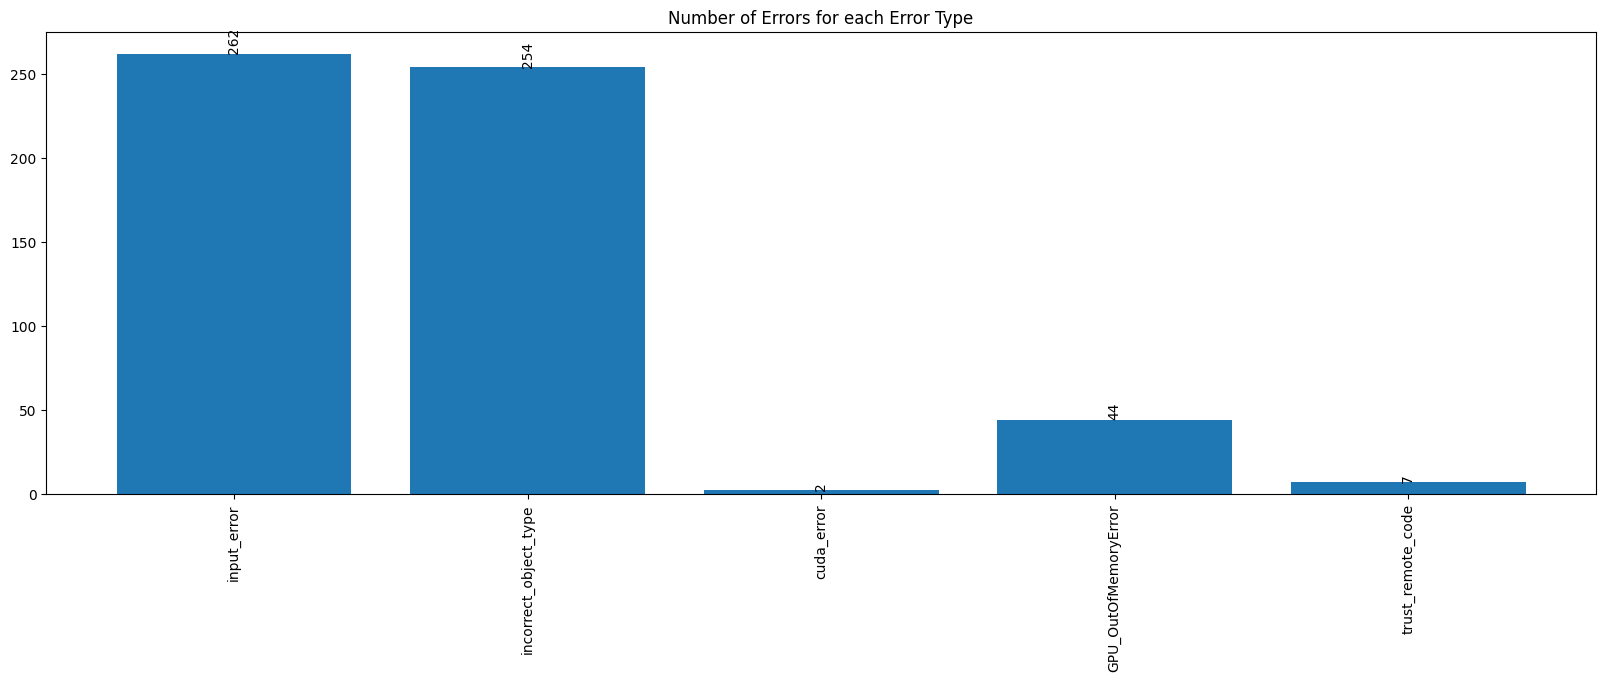

In [27]:
plot(err_count, "Number of Errors for each Error Type")